# Лабораторная работа 5 "Множественная регрессия"
# Вариант №3

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Считываем набор данных для третьего варианта

In [4]:
df = pd.read_excel('v3_table.xlsx')

In [5]:
df.head()

,x1,x2,x3,y
0,48,44,47,34
1,57,35,56,35
2,55,39,54,38
3,61,43,62,39
4,56,36,56,41


## 1. Рассчитать параметры линейного уравнения множественной регрессии с полным перечнем факторов. 

In [6]:
X = df[['x1', 'x2', 'x3']]
X = sm.add_constant(X)  # Добавляем константу
y = df['y']

In [7]:
model = sm.OLS(y, X).fit() # Обучаем модель множественной регрессии

In [8]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     58.89
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.17e-06
Time:                        22:07:14   Log-Likelihood:                -28.102
No. Observations:                  14   AIC:                             64.20
Df Residuals:                      10   BIC:                             66.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3248      5.909      0.563      0.5

/home/eugene/miniconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  k, _ = kurtosistest(a, axis)


## 2. Оценить значимость уравнения в целом, используя значение множественного коэффициента корреляции и общего F-критерия Фишера.

In [9]:
print(f"Множественный коэффициент корреляции: {np.sqrt(model.rsquared)}")
print(f"F-статистика: {model.fvalue}, p-value: {model.f_pvalue}")

Множественный коэффициент корреляции: 0.9728471690773998
F-статистика: 58.89242342360955, p-value: 1.1671216997748412e-06


Выводы из пункта:
- 97.2 % изменчивости целевой переменной `y` объяснено построенным уравнением множественной регрессии;
- Посколкьу p-value для рассчитанной F-статистики существенно ниже уровня значимости 0.05, мы можем сказать, что построенное уравнение множественной регрессии является стат. значимым 

## 3. Оценить статистическую значимость параметров регрессионной модели с помощью t-критерия.

In [10]:
print(model.tvalues)

const    0.562693
x1       0.001068
x2       0.898166
x3       0.544480
dtype: float64


In [11]:
alpha = 0.05
n = len(df)  # Количество примеров в датасете
k = len(model.params) - 1  # Количество независимых переменных (не считая )

# Степени свободы
degrees_of_freedom = n - k - 1

# Критическое значение t-статистики (двусторонний тест)
t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

print(f"Критическое значение t-статистики (α = {alpha}, degrees_of_freedom = {degrees_of_freedom}): {t_critical:.4f}")

Критическое значение t-статистики (α = 0.05, degrees_of_freedom = 10): 2.2281


In [15]:
for ind_var_t_stat in model.tvalues.tolist():
    if abs(ind_var_t_stat) > abs(t_critical):
        print(True)
    else:
        print(False)

False
False
False
False


Выводы из пункта:
- Поскольку значения t-статистики для каждой из нецелевых переменных не превышают по модулю t-stat.crit., данное уравнение не может быть использовано для прогнозирования

## Исследовать коллинеарность между факторами. При наличии мультиколлинеарности исключить какой-либо фактор из уравнения регрессии.

In [17]:
corr_matrix = df[['x1', 'x2', 'x3']].corr()

In [18]:
corr_matrix

,x1,x2,x3
x1,1.000000,0.361976,0.999022
x2,0.361976,1.000000,0.373459
x3,0.999022,0.373459,1.000000


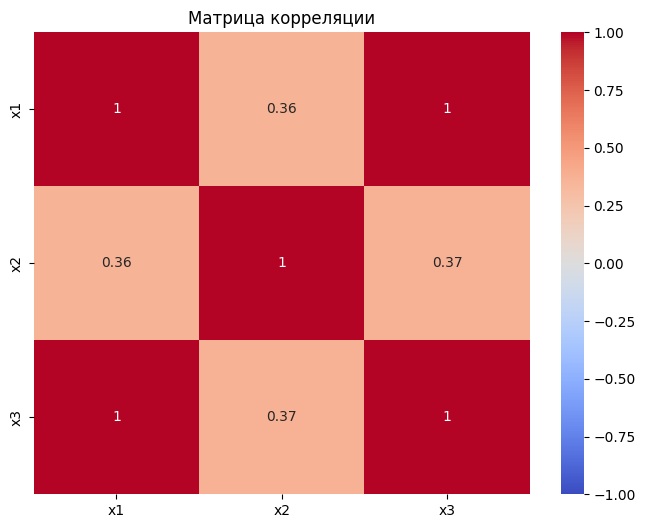

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Матрица корреляции")
plt.show()

Видим, что третья и первая независимые переменные очень сильно между собой коррелируют. Поскольку коэффициенты парной корреляции у этих двух факторов примерно одинаковые, можно исключить любой из них. Например, `x3`.

## 5. Построить новое уравнение множественной регрессии, провести все необходимые исследования, аналогичные проведенным выше.


In [22]:
X = df[['x1', 'x2']]
X = sm.add_constant(X)  # Добавляем константу
y = df['y']

In [23]:
model = sm.OLS(y, X).fit() # Обучаем модель множественной регрессии

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     94.22
Date:                Wed, 19 Mar 2025   Prob (F-statistic):           1.20e-07
Time:                        22:23:02   Log-Likelihood:                -28.306
No. Observations:                  14   AIC:                             62.61
Df Residuals:                      11   BIC:                             64.53
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0509      5.249      0.391      0.7

/home/eugene/miniconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  k, _ = kurtosistest(a, axis)


#### Оценить значимость уравнения в целом, используя значение множественного коэффициента корреляции и общего F-критерия Фишера.

In [25]:
print(f"Множественный коэффициент корреляции: {np.sqrt(model.rsquared)}")
print(f"F-статистика: {model.fvalue}, p-value: {model.f_pvalue}")

Множественный коэффициент корреляции: 0.9720306255611043
F-статистика: 94.21632885275885, p-value: 1.1988925065427086e-07


Выводы из пункта:
- 97.2 % изменчивости целевой переменной `y` объяснено построенным уравнением множественной регрессии;
- Посколкьу p-value для рассчитанной F-статистики существенно ниже уровня значимости 0.05, мы можем сказать, что построенное уравнение множественной регрессии является стат. значимым 

#### Оценить статистическую значимость параметров регрессионной модели с помощью t-критерия.

In [27]:
print(model.tvalues)

const     0.390698
x1       12.340250
x2        1.137959
dtype: float64


In [28]:
alpha = 0.05
n = len(df)  # Количество примеров в датасете
k = len(model.params) - 1  # Количество независимых переменных (не считая )

# Степени свободы
degrees_of_freedom = n - k - 1

# Критическое значение t-статистики (двусторонний тест)
t_critical = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

print(f"Критическое значение t-статистики (α = {alpha}, degrees_of_freedom = {degrees_of_freedom}): {t_critical:.4f}")

Критическое значение t-статистики (α = 0.05, degrees_of_freedom = 11): 2.2010


In [29]:
for ind_var_t_stat in model.tvalues.tolist():
    if abs(ind_var_t_stat) > abs(t_critical):
        print(True)
    else:
        print(False)

False
True
False


Выводы из пункта:
- Независимая переменная `x1` имеет значение t-статистики существенно больше, чем t-stat.crit., следовательно, построенное уравнение множественной регрессии может использоваться для прогнозирования 

## 6. На основании результатов п. 5 найти
* средние коэффициенты эластичности фактора y от независимых
факторов;
* прогнозное значение результата при значении важнейшей
объясняющей переменной, равном максимальному наблюденному значению,
увеличенному на 10 %, и при значении второй объясняющей переменной,
равном минимальному наблюденному значению, уменьшенному на 15%.
* Интервальное предсказание значения y с надежностью 0,95.

In [30]:
# а) Средние коэффициенты эластичности
elasticities = model.params[1:] * X.mean() / y.mean()
print("Средние коэффициенты эластичности:")
print(elasticities)

Средние коэффициенты эластичности:
const         NaN
x1       0.767090
x2       0.176164
dtype: float64


In [31]:
# б) Прогнозное значение
x1_max = df['x1'].max() * 1.10
x2_min = df['x2'].min() * 0.85
new_data = pd.DataFrame({'const': [1], 'x1': [x1_max], 'x2': [x2_min]})
prediction = model.predict(new_data)
print(f"Прогнозное значение y: {prediction[0]}")

Прогнозное значение y: 50.928134031511775


In [43]:
# в) Интервальное предсказание
prediction = model.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)
print(f"Интервальное предсказание y: [{prediction_summary.mean_ci_lower.tolist()[0]}, {prediction_summary.mean_ci_upper.tolist()[0]}]")

Интервальное предсказание y: [45.04906833708088, 56.80719972594267]
